In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import os

path = 'C:\\Users\\user\\OneDrive\\바탕 화면\\수요예측\\train.csv'

In [2]:
df = pd.read_csv('train.csv')
df.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2013-01-01,0,0,0,0,a,1
1,2,2,2013-01-01,0,0,0,0,a,1
2,3,2,2013-01-01,0,0,0,0,a,1
3,4,2,2013-01-01,0,0,0,0,a,1
4,5,2,2013-01-01,0,0,0,0,a,1


In [3]:
df.shape

(1017209, 9)

In [4]:
store = pd.read_csv('store.csv')

In [5]:
store.shape

(1115, 10)

## Merge the Data

In [6]:
data = df.merge(store, on = ['Store'], how = 'inner')

In [7]:
data.shape

(1017209, 18)

In [9]:
print('Distinct number of Stores:', len(data['Store'].unique()))
print('Average daily sales of all Stores:', round(data['Sales'].mean(), 2))

Distinct number of Stores: 1115
Distinct number of Stores: 942
Average daily sales of all Stores: 5773.82


In [10]:
data['DayOfWeek'].value_counts()

4    145845
5    145845
3    145665
2    145664
1    144730
6    144730
7    144730
Name: DayOfWeek, dtype: int64

## Create new columns related to Dates 

In [11]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)

In [12]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)


data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter
data['Week'] = data['Date'].dt.week
data['Day'] = data['Date'].dt.day

data['Season'] = np.where(data['Month'].isin([3,4,5]), "Spring",
                 np.where(data['Month'].isin([6,7,8]), "Summer",
                 np.where(data['Month'].isin([9,10,11]), "Fall",
                 np.where(data['Month'].isin([12,1,2]), "Winter", "None"))))


<ipython-input-12-edf1aef2f9e0>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Date'].dt.week


In [13]:
# plt.hist(data['Sales'])
# plt.title('Histogram of Store Sales')
# plt.ylabel('bins')
# plt.xlabel('frequency') 
# plt.show()

In [14]:
# data.groupby('Month')[['Sales']].mean().plot(figsize = (10,5),marker='o')


In [15]:
# data.groupby('Month')[['Customers']].mean().plot(figsize = (10,5),marker='o')


In [16]:
# data.iloc[:,-6:].head() 

In [17]:
# data.hist(figsize = (20,15))
# plt.show()

In [18]:
# data.isnull().sum()


In [19]:
#data = data.fillna(0)

#data.isnull().sum()


In [20]:

# A_StoreType = data.loc[data['StoreType']=='a']
# A_StoreType
# B_StoreType = data.loc[data['StoreType']=='b']
# C_StoreType = data.loc[data['StoreType']=='c']
# D_StoreType = data.loc[data['StoreType']=='d']

In [22]:
train_data=data.drop(columns = ['Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance',
                            'CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear',
                            'PromoInterval','Year', 'Month','Quarter','Week','Day','Season','DayOfWeek','Date','Store'])
train_data

,Sales,Customers
0,0,0
1,5530,668
2,4327,578
3,4486,619
4,4997,635
...,...,...
1017204,6011,812
1017205,4592,705
1017206,4522,689
1017207,4591,673


In [23]:
Sales = data['Sales'].values
Customers = data['Customers'].values

In [24]:

# normalized_data = []
# for window in result:
#     if ZeroDivisionError:
#         print("0")
#     else:
#         normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
#         normalized_data.append(normalized_window)

# result = np.array(normalized_data)

In [25]:
seq_len = 30 
sequence_length = seq_len + 1 

result = []
for index in range(len(Sales) - sequence_length):
    result.append(Sales[index:index + sequence_length])
result = np.array(result)
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

In [26]:
x_train = train[:, :-1] 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]


x_train.shape, x_test.shape

((915460, 30, 1), (101718, 30, 1))

In [39]:
x_train

array([[[ 3525],
        [ 3470],
        [ 4005],
        ...,
        [ 3511],
        [ 3564],
        [ 3381]],

       [[ 4834],
        [ 6574],
        [    0],
        ...,
        [ 4914],
        [ 5181],
        [ 5273]],

       [[ 7428],
        [ 6256],
        [ 7318],
        ...,
        [ 7007],
        [ 9324],
        [ 9335]],

       ...,

       [[ 8172],
        [ 7222],
        [ 8697],
        ...,
        [ 8126],
        [ 7794],
        [ 7435]],

       [[    0],
        [ 8778],
        [ 8600],
        ...,
        [ 5018],
        [ 7430],
        [ 6131]],

       [[14560],
        [12759],
        [13092],
        ...,
        [10687],
        [13043],
        [13132]]], dtype=int64)

In [40]:
import tensorflow as tf
from tensorflow.keras import layers

In [41]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(30,input_shape=(30,1),return_sequences=True))
model.add(tf.keras.layers.LSTM(30,return_sequences=False))
model.add(tf.keras.layers.Dense(1))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30, 30)            3840      
_________________________________________________________________
lstm_3 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,191
Trainable params: 11,191
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss='mse', 
              optimizer=tf.keras.optimizers.Adam(0.001), 
              metrics=['mse'])

In [46]:
results = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=16,
                    epochs=10)

Epoch 1/10
  349/57217 [..............................] - ETA: 24:19 - loss: 36581992.0000 - mse: 36581992.0000

KeyboardInterrupt: 

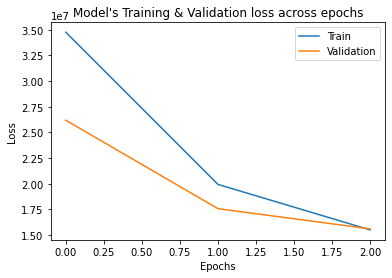

In [36]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

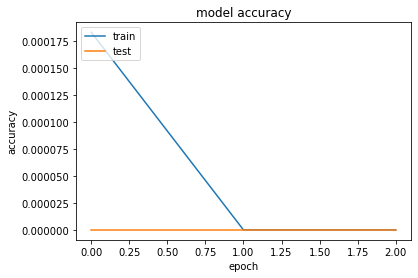

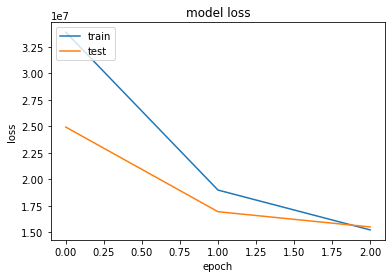

In [52]:
import matplotlib.pyplot as plt
# # Fit the model
# list all data in history
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

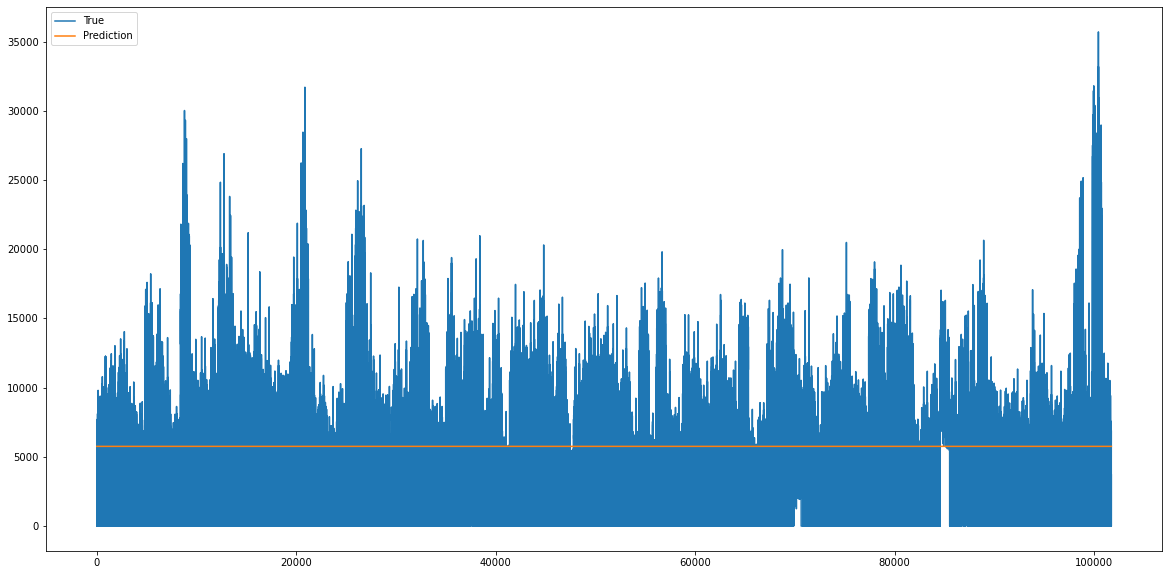

In [50]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()